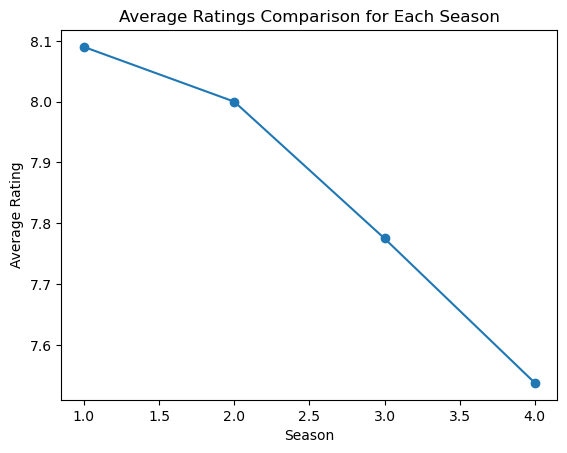

Episodes with Average Rating > 8 for Each Season:
Season 1:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2:
Kiksuya
Vanishing Point
The Passenger

Season 3:

Season 4:

Episodes Aired Before May 2019:

Episode with Highest Rating in Each Season:

Episode with Lowest Rating in Each Season:

Summary for the Most Popular Episode in Each Season:


In [5]:
#question 8
import requests
import matplotlib.pyplot as plt

# Send a GET request to retrieve the data
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = response.json()

# Extract the episodes data
episodes = data['_embedded']['episodes']

# 1. Compare ratings for all seasons
season_ratings = {}
for episode in episodes:
    season = episode['season']
    rating = episode['rating']['average']
    if season in season_ratings:
        season_ratings[season].append(rating)
    else:
        season_ratings[season] = [rating]

# Create a plot for ratings comparison
seasons = sorted(season_ratings.keys())
average_ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in seasons]

plt.plot(seasons, average_ratings, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings Comparison for Each Season')
plt.show()

# 2. Episodes with average rating > 8 for each season
high_rating_episodes = {}
for season in season_ratings:
    high_rating_episodes[season] = [episode['name'] for episode in episodes if
                                    episode['season'] == season and episode['rating']['average'] > 8]

# Print the episodes with average rating > 8 for each season
print("Episodes with Average Rating > 8 for Each Season:")
for season, episodes in high_rating_episodes.items():
    print(f"Season {season}:")
    for episode in episodes:
        print(episode)
    print()

# 3. Episodes aired before May 2019
episodes_before_2019 = [episode['name'] for episode in episodes if episode['airdate'] < '2019-05-01']

# Print episodes aired before May 2019
print("Episodes Aired Before May 2019:")
for episode in episodes_before_2019:
    print(episode)
print()

# 4. Episode with highest and lowest rating for each season
highest_rating_episodes = {}
lowest_rating_episodes = {}
for season in season_ratings:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    if season_episodes:
        highest_rating = max(season_episodes, key=lambda x: x['rating']['average'])
        lowest_rating = min(season_episodes, key=lambda x: x['rating']['average'])
        highest_rating_episodes[season] = highest_rating['name']
        lowest_rating_episodes[season] = lowest_rating['name']

# Print episodes with highest and lowest ratings for each season
print("Episode with Highest Rating in Each Season:")
for season, episode in highest_rating_episodes.items():
    print(f"Season {season}: {episode}")
print()

print("Episode with Lowest Rating in Each Season:")
for season, episode in lowest_rating_episodes.items():
    print(f"Season {season}: {episode}")
print()

# 5. Most popular (highest rated) episode summary for each season
popular_episodes = {}
for season in season_ratings:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    if season_episodes:
        popular_episode = max(season_episodes, key=lambda x: x['rating']['average'])
        popular_episodes[season] = popular_episode['summary']

# Print summaries for the most popular episodes in each season
print("Summary for the Most Popular Episode in Each Season:")
for season, summary in popular_episodes.items():
    print(f"Season {season}:")
    print(summary)
    print()
